In [1]:
from fastai.vision import *

In [3]:
path = Config.data_path()/'ASL'
path

PosixPath('/home/jupyter/.fastai/data/ASL')

In [4]:
! kaggle datasets download grassknoted/asl-alphabet -p {path}

 99%|█████████████████████████████████████▌| 1.00G/1.01G [00:18<00:00, 43.2MB/s]
100%|██████████████████████████████████████| 1.01G/1.01G [00:18<00:00, 59.4MB/s]


In [6]:
path = path/'data'
path

PosixPath('/home/jupyter/.fastai/data/ASL/data')

In [28]:
# for alphabet in os.listdir(path):
#     for image in os.listdir(path/alphabet):
#         ImageOps.crop(open_image(path/alphabet/image),border = 5).save(path/alphabet/image)
        
    

In [36]:
data = ImageDataBunch.from_folder(path,train = '.',valid_pct = 0.2, ds_tfms = get_transforms(),size = 224,bs = 64,num_workers = 4).normalize(imagenet_stats)

In [37]:
data.classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

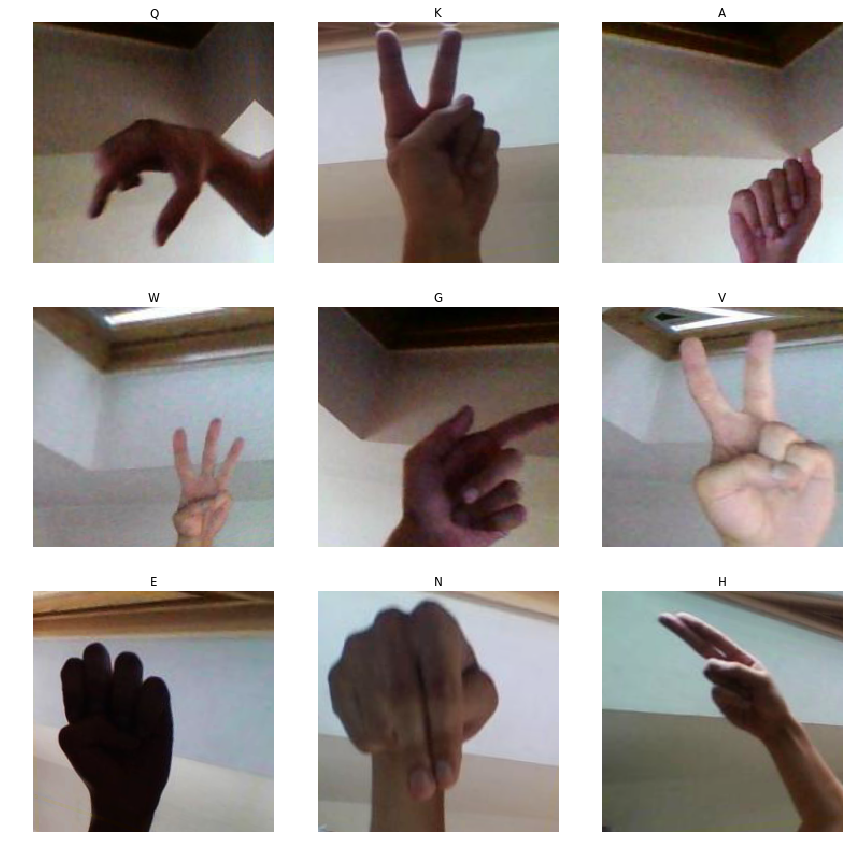

In [38]:
data.show_batch(3)

In [39]:
from fastai.metrics import accuracy

In [40]:
learn = create_cnn(data,models.resnet34,metrics = accuracy)

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


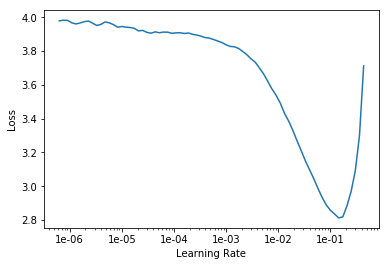

In [43]:
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(4,max_lr = 3e-2)

epoch,train_loss,valid_loss,accuracy
1,0.427978,0.638351,0.855517
2,0.347526,0.295273,0.950115
3,0.092332,0.007156,0.997816
4,0.025047,0.001660,0.999713


In [45]:
learn.save('4-3e-2')

In [56]:
learn.load('4-3e-2')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (69600 items)
[Category J, Category J, Category J, Category J, Category J]...
Path: /home/jupyter/.fastai/data/ASL/data
x: ImageItemList (69600 items)
[Image (3, 195, 195), Image (3, 195, 195), Image (3, 195, 195), Image (3, 195, 195), Image (3, 195, 195)]...
Path: /home/jupyter/.fastai/data/ASL/data;

Valid: LabelList
y: CategoryList (17400 items)
[Category M, Category nothing, Category Q, Category S, Category J]...
Path: /home/jupyter/.fastai/data/ASL/data
x: ImageItemList (17400 items)
[Image (3, 195, 195), Image (3, 195, 195), Image (3, 195, 195), Image (3, 195, 195), Image (3, 195, 195)]...
Path: /home/jupyter/.fastai/data/ASL/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2,

In [57]:
interp = ClassificationInterpretation.from_learner(learn)

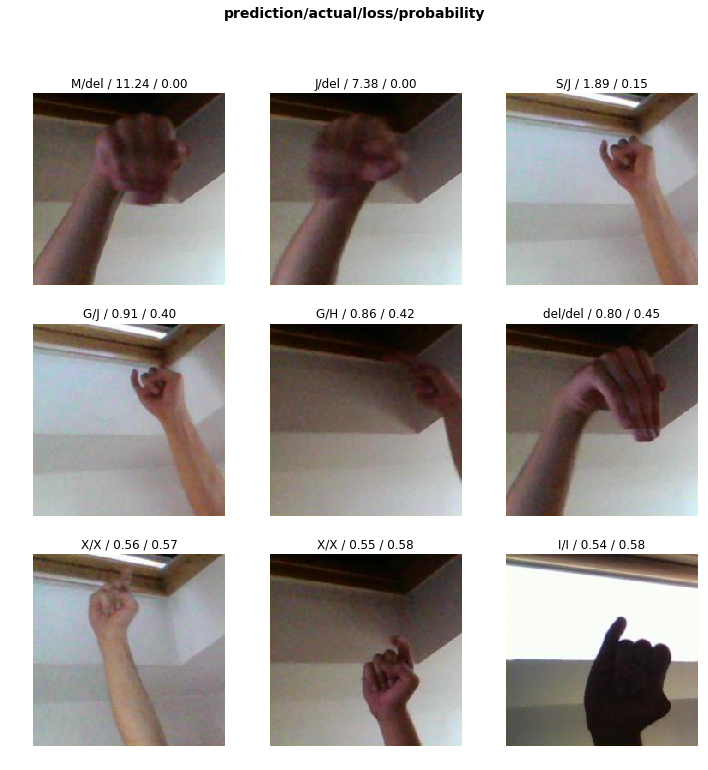

In [58]:
interp.plot_top_losses(9)

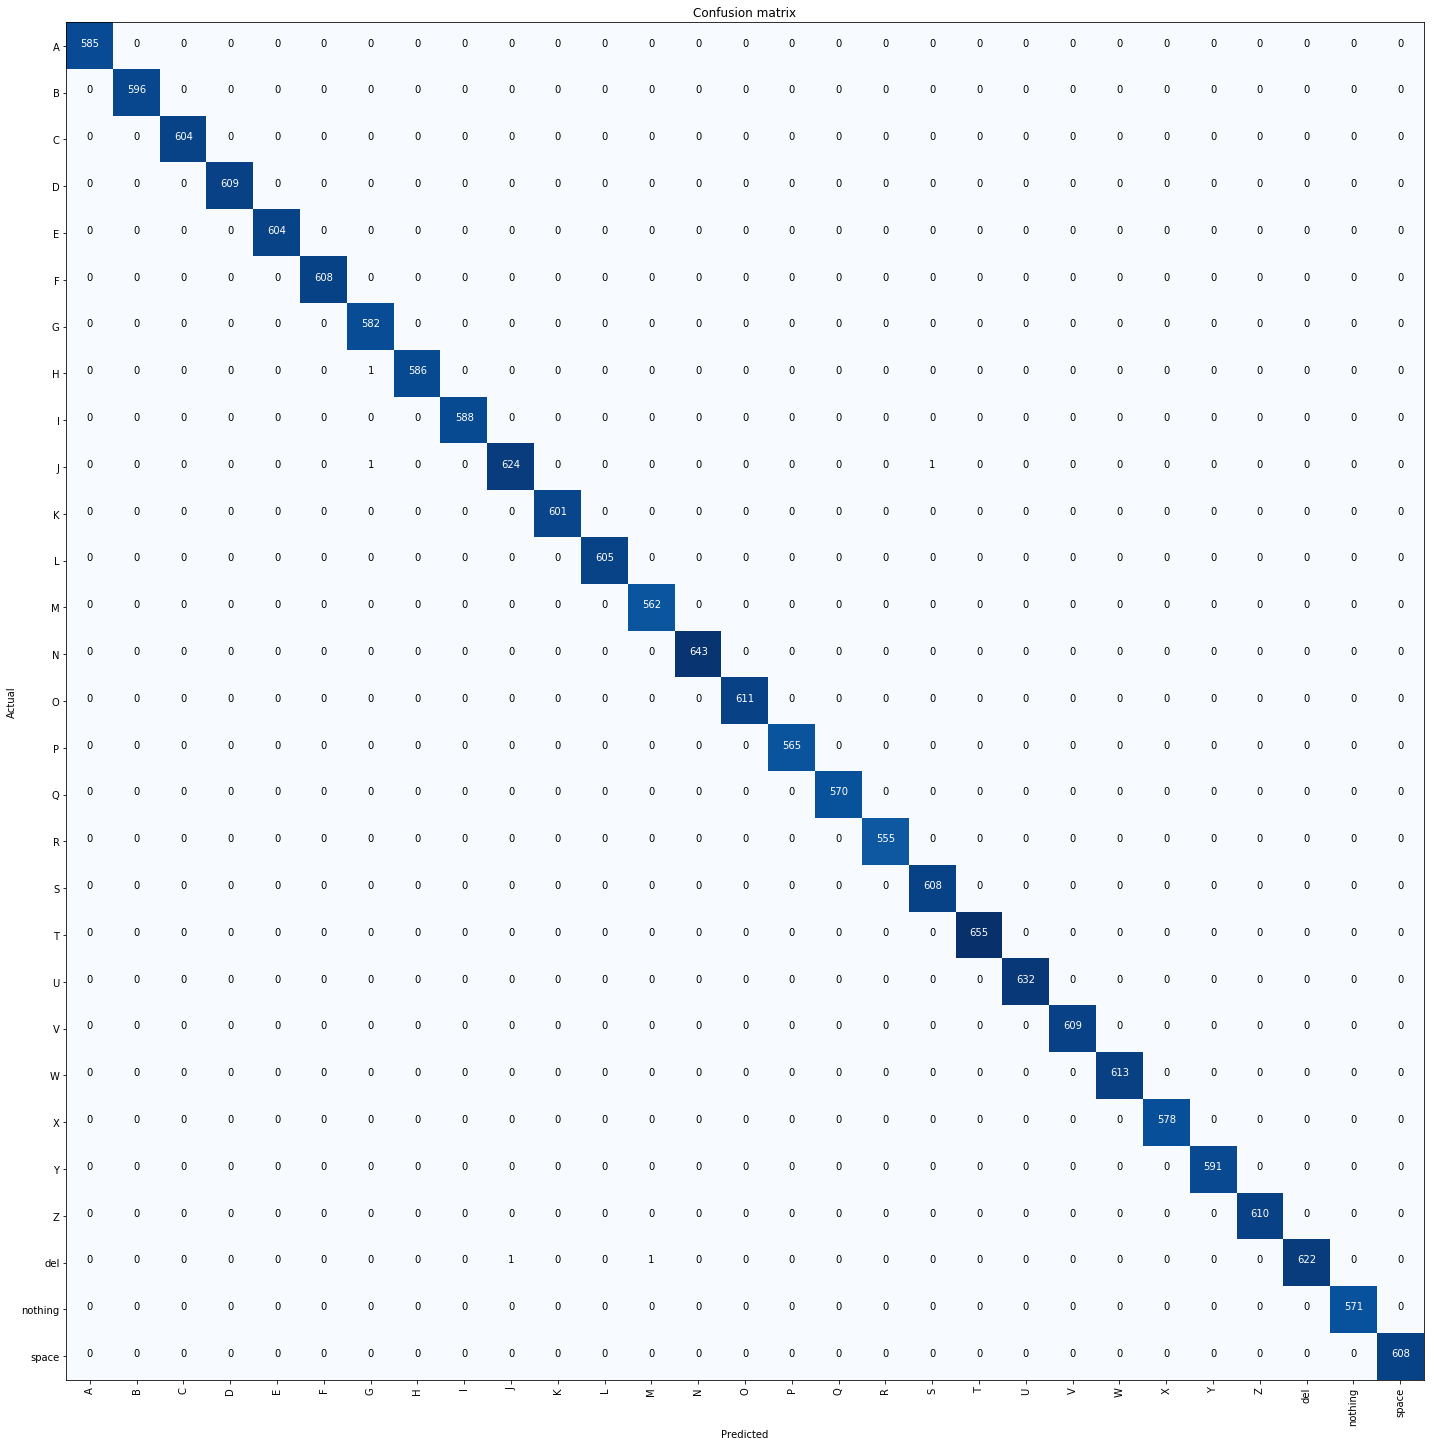

In [60]:
interp.plot_confusion_matrix(figsize = (20,20))

In [68]:
import cv2
cap = cv2.VideoCapture(0)

In [69]:
while(True):
    ret,frame = cap.read()
    gt_img = cv2.imread('ground_truth.jpg')
    cv2.imshow('ground_truth frame',gt_img)
    if cv2.waitKey(1) == ord('n'):
        cv2.imwrite('test1.jpg',frame)
        img = open_image(pathlib.PosixPath('./test1.jpg'))
        label,index, pred = learn.predict(img)
        cv2.putText(frame, "Alphabet = "+label, (380, 25),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 215), 2)
        cv2.putText(frame, "Prob = {0:.4f}".format(torch.max(pred).item()), (380, 50),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        cv2.imshow("Predictions",frame)
        print("Current alphabet =\n",torch.max(pred).item())
        print("\t\t "+label+"\t\t")
        if cv2.waitKey(10) == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
    

error: OpenCV(4.0.0) /io/opencv/modules/highgui/src/window.cpp:350: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [70]:
learn.export('ASL.pkl')

In [72]:
doc(learn.export)